<a href="https://colab.research.google.com/github/Saeed-Akbari/CS5783-MachineLearning/blob/main/Assignment2/problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I answer the questions in the second problem in this notebook.

**1. What is the activation function that you will choose for the output layer? Justify your answer briefly.**

I use linear activation for the output layer since this is a regression model. Regression has real values so the activation function must have a range from negative to positive infinity.

**2. How many neurons should there be in the output layer? Why?**

There must be one neuron at the output layer as we have one label on the data. This must be as same as the number of labels the data has.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data

# Change the paths to where you have saved the input files.
#path="/content/drive/MyDrive/machineLearning/Assignment2/"
path="/content/drive/MyDrive/"
pathX1=path+"X_train.csv"
pathY1=path+"Y_train.csv"
pathX2=path+"X_test.csv"
pathY2=path+"Y_test.csv"

xtrain = pd.read_csv(pathX1).to_numpy()
ytrain = pd.read_csv(pathY1).to_numpy()
xtest = pd.read_csv(pathX2).to_numpy()
ytest = pd.read_csv(pathY2).to_numpy()

In [4]:
# standardization of data

# take mean and standard deviation of features of the training set for standardization
meanX = np.mean(xtrain, axis=0)
stdX = np.std(xtrain, axis=0)
# standardize features of the trainig set
xtrainSt = (xtrain - meanX) / stdX
xtrainSt = xtrainSt.T

meanY = np.mean(ytrain, axis=0)
stdY = np.std(ytrain, axis=0)
# standardize features of the trainig set
ytrainSt = (ytrain - meanY) / stdY
ytrainSt = ytrainSt.T

xtestSt = (xtest - meanX) / stdX
xtestSt = xtestSt.T

In [5]:
# Neural network model

class mlpNet():

    def __init__(self, X, Y, activation):

        self.X = X
        self.Y = Y
        self.n_x = X.shape[0] # size of input layer
        self.n_y = Y.shape[0] # size of output layer
        self.activation = activation

    def sigmoid(self, Z):
        return 1/(1+np.exp(-Z))

    def relu(self, Z):
        return np.maximum(0,Z)

    def initialize_parameters(self, n_x, n_h, n_y):
        
        W1 = np.random.randn(n_h,n_x) * 0.01
        b1 = np.zeros((n_h,1))
        W2 = np.random.randn(n_y,n_h) * 0.01
        b2 = np.zeros((n_y,1))
        
        parameters = {"W1": W1,
                    "b1": b1,
                    "W2": W2,
                    "b2": b2}
        
        return parameters

    def forward_propagation(self, X, parameters):

        # Retrieve each parameter from the dictionary "parameters"
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Implement Forward Propagation to calculate A2
        Z1 = np.dot(W1,X) + b1

        if self.activation == "sigmoid":
            A1 = self.sigmoid(Z1)
        elif self.activation == "relu":
            A1 = self.relu(Z1)
        elif self.activation == "tanh":
            A1 = np.tanh(Z1)
        else:
            A1 = self.sigmoid(Z1)

        Z2 = np.dot(W2,A1) + b2
        A2 = np.copy(Z2)
        
        cache = {"Z1": Z1,
                "A1": A1,
                "Z2": Z2,
                "A2": A2}
        
        return A2, cache


    def compute_cost(self, A2, Y):
        
        m = Y.shape[1] # number of example

        # Compute the cross-entropy cost
        cost = (1/m) * (Y - A2) @ (Y - A2).T

        cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. E.g., turns [[17]] into 17

        return cost


    def backward_propagation(self, parameters, cache, X, Y):

        m = X.shape[1]
        
        # First, retrieve W1 and W2 from the dictionary "parameters".
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
            
        # Retrieve also A1 and A2 from dictionary "cache".
        A1 = cache["A1"]
        A2 = cache["A2"]
        Z1 = cache["Z1"]
        Z2 = cache["Z2"]
    
        # Backward propagation: calculate dW1, db1, dW2, db2. 
        dZ2 = A2 - Y
        dW2 = (1/m) * np.dot(dZ2,A1.T)
        db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))

        if self.activation == "sigmoid":
            dZ1 = np.dot(W2.T,dZ2) * self.sigmoid(Z1) * (1 - self.sigmoid(Z1))
        elif self.activation == "relu":
            dZ1 = np.array(np.dot(W2.T,dZ2), copy=True)
            dZ1[Z1 <= 0] = 0
        elif self.activation == "tanh":
            dZ1 = np.dot(W2.T,dZ2) * (1 - np.tanh(Z1)*np.tanh(Z1))
        else:
            dZ1 = np.dot(W2.T,dZ2) * self.sigmoid(Z1) * (1 - self.sigmoid(Z1))

        dW1 = (1/m) *(np.dot(dZ1,X.T))
        db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
        
        grads = {"dW1": dW1,
                "db1": db1,
                "dW2": dW2,
                "db2": db2}
        
        return grads


    def update_parameters(self, parameters, grads, learning_rate):

        # Retrieve each parameter from the dictionary "parameters"
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Retrieve each gradient from the dictionary "grads"
        dW1 = grads["dW1"]
        db1 = grads["db1"]
        dW2 = grads["dW2"]
        db2 = grads["db2"]
        
        # Update rule for each parameter
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
    
        parameters = {"W1": W1,
                    "b1": b1,
                    "W2": W2,
                    "b2": b2}
        
        return parameters


    def nn_model(self, n_h, learning_rate, num_iterations, print_cost=False):
        
        X = self.X
        Y = self.Y
        n_x = self.n_x
        n_y = self.n_y
        
        # Initialize parameters
        parameters = self.initialize_parameters(n_x, n_h, n_y)
        
        J_all = []
        # Loop (gradient descent)
        for i in range(0, num_iterations):
            # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
            A2, cache = self.forward_propagation(X, parameters)
            # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
            cost = self.compute_cost(A2, Y)
            J_all.append(cost)
            # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
            grads = self.backward_propagation(parameters, cache, X, Y)
            # Update rule for each parameter
            parameters = self.update_parameters(parameters, grads, learning_rate)
            # If print_cost=True, Print the cost every 1000 iterations
            if print_cost and i % 1000 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
        # Returns parameters learnt by the model. They can then be used to predict output
        return parameters, J_all


    def predict(self, parameters, X):
        
        A2, _ = self.forward_propagation(X, parameters)
        
        return A2


    def plot_cost(self,J_all, num_epochs, activation):
        plt.figure(1)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.plot(np.arange(num_epochs), J_all, 'b', linewidth = "3")

In [6]:
# hyperparameters

epochs=5000     # number of epochs
lr = 0.1        # learning rate
n_h = 4         # number of neurons at hidden layers
activation = "sigmoid"          # sigmoid, relu, tanh

In [7]:
# initialize the model
myNetwork = mlpNet(xtrainSt, ytrainSt, activation)

In [8]:
# train the model
parameters, J_all = myNetwork.nn_model(n_h, lr,epochs, print_cost=True)

Cost after iteration 0: 1.000344
Cost after iteration 1000: 0.005557
Cost after iteration 2000: 0.003621
Cost after iteration 3000: 0.002738
Cost after iteration 4000: 0.002236


In [9]:
# parameters after training
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.01129554  0.72869706]
 [-0.01610607 -0.68457461]
 [-0.0399499  -0.7178689 ]
 [-0.02960304  0.72632324]]
b1 = [[-0.04520758]
 [ 0.0118165 ]
 [ 0.02813397]
 [-0.10117432]]
W2 = [[ 1.49966034 -1.10562616 -1.49560643  1.9421238 ]]
b2 = [[-0.34588575]]


**3. Report the average MSE loss and the accuracy.**

The calculation of the average MSE loss is in the below cell.

In [10]:
# average least square error
aveError = np.average(np.array(J_all))
print("average cost with "+activation+" activation function  = ", aveError)

average cost with sigmoid activation function  =  0.041894103475489


**4. Plot the loss and accuracy as a function of the number of iterations.**

The plot is in the below cell.

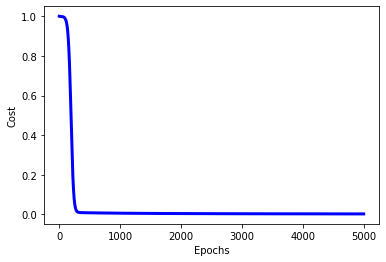

In [11]:
# plot the cost function
myNetwork.plot_cost(J_all, epochs, activation)
plt.show()

In [12]:
# prediction on training set
ytrainHatSc = myNetwork.predict(parameters, xtrainSt)

# inverse the data standardization
ytrainHat = ytrainHatSc * stdY + meanY
ytrainHat = ytrainHat.T

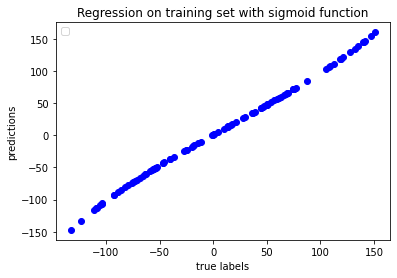

In [13]:
plt.figure(8)
plt.plot(ytrainHat[:,0], ytrain[:,0], 'o', color = 'blue')
plt.xlabel('true labels')
plt.ylabel('predictions')
plt.title("Regression on training set with "+activation+" function")
plt.legend(loc="upper left")
plt.show()

In the above figure, having data on the bisector of first quadrant means predictions are equal to labels.

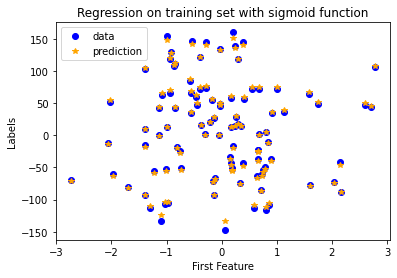

In [14]:
plt.figure(2)
plt.plot(xtrain[:,0], ytrain[:,0], 'o', color = 'blue', label="data")
plt.plot(xtrain[:,0], ytrainHat[:,0], '*', color = 'orange', label="prediction")  
plt.xlabel('First Feature')
plt.ylabel('Labels')
plt.title("Regression on training set with "+activation+" function")
plt.legend(loc="upper left")
plt.show()

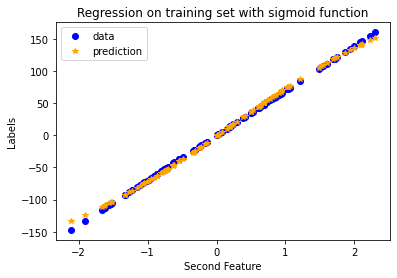

In [15]:
plt.figure(3)
plt.plot(xtrain[:,1], ytrain[:,0], 'o', color = 'blue', label="data")
plt.plot(xtrain[:,1], ytrainHat[:,0], '*', color = 'orange', label="prediction")  
plt.xlabel('Second Feature')
plt.ylabel('Labels')
plt.title("Regression on training set with "+activation+" function")
plt.legend(loc="upper left")
plt.show()

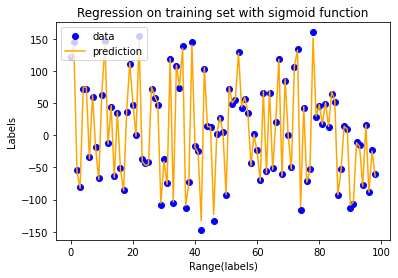

In [16]:
plt.figure(4)
plt.plot(np.arange(len(ytrain[:,0])), ytrain[:,0], 'o', color = 'blue', label="data")
plt.plot(np.arange(len(ytrainHat[:,0])), ytrainHat[:,0], color = 'orange', label="prediction")  
plt.xlabel('Range(labels)')
plt.ylabel('Labels')
plt.title("Regression on training set with "+activation+" function")
plt.legend(loc="upper left")
plt.show()

In [17]:
# prediction on test set
ytestHatSc = myNetwork.predict(parameters, xtestSt)

# inverse the data standardization
ytestHat = ytestHatSc * stdY + meanY
ytestHat = ytestHat.T

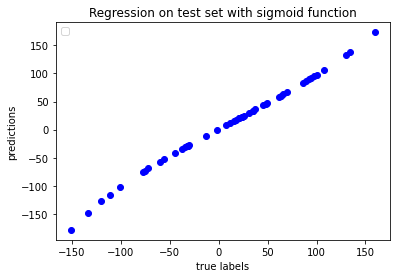

In [18]:
plt.figure(9)
plt.plot(ytestHat[:,0], ytest[:,0], 'o', color = 'blue')
plt.xlabel('true labels')
plt.ylabel('predictions')
plt.title("Regression on test set with "+activation+" function")
plt.legend(loc="upper left")
plt.show()

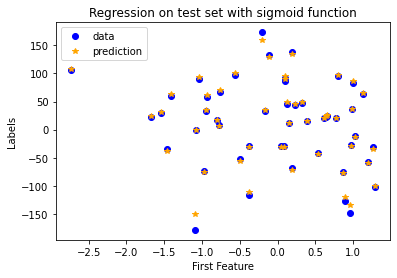

In [19]:
plt.figure(5)
plt.plot(xtest[:,0], ytest[:,0], 'o', color = 'blue', label="data")
plt.plot(xtest[:,0], ytestHat[:,0], '*', color = 'orange', label="prediction")  
plt.xlabel('First Feature')
plt.ylabel('Labels')
plt.title("Regression on test set with "+activation+" function")
plt.legend(loc="upper left")
plt.show()

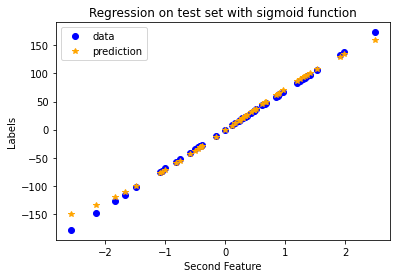

In [20]:
plt.figure(6)
plt.plot(xtest[:,1], ytest[:,0], 'o', color = 'blue', label="data")
plt.plot(xtest[:,1], ytestHat[:,0], '*', color = 'orange', label="prediction")  
plt.xlabel('Second Feature')
plt.ylabel('Labels')
plt.title("Regression on test set with "+activation+" function")
plt.legend(loc="upper left")
plt.show()

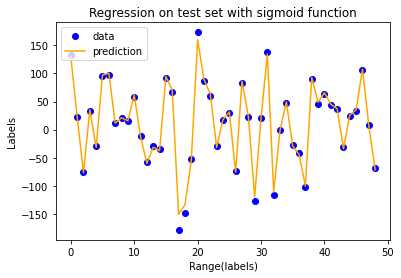

In [21]:
plt.figure(7)
plt.plot(np.arange(len(ytest[:,0])), ytest[:,0], 'o', color = 'blue', label="data")
plt.plot(np.arange(len(ytestHat[:,0])), ytestHat[:,0], color = 'orange', label="prediction")  
plt.xlabel('Range(labels)')
plt.ylabel('Labels')
plt.title("Regression on test set with "+activation+" function")
plt.legend(loc="upper left")
plt.show()

**5. What is the effect of the learning rate on the training process? Vary the learning rate to be between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.**

The code and plot are in the two below cells.

The cost is higher for very small learning rate since reducing learning rate needs more epochs to get as same error as the models with bigger learning rate. So by increasing learning rate the cost is decreasing up tp some learning rate (0.9 in my simulation), then the cost starts increasing.

In [22]:
# hyperparameters

epochs = 1000   # number of epochs
lr = 0.1        # learning rate
n_h = 4         # number of neurons at hidden layers
activation = "sigmoid"          # sigmoid, relu, tanh

lrList = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
errLr = []
for lr in lrList:
  # initialize the model
  myNetwork2 = mlpNet(xtrainSt, ytrainSt, activation)

  # train the model
  parameters2, J_all2 = myNetwork2.nn_model(n_h, lr,epochs, print_cost=False)

  # average least square error
  aveError2 = np.average(np.array(J_all2))

  errLr.append(aveError2)
  print("learning rate = {} and error = {}".format(lr, aveError2))

learning rate = 0.001 and error = 0.9999749084260513
learning rate = 0.005 and error = 0.9999510043221495
learning rate = 0.01 and error = 0.999348835448122
learning rate = 0.05 and error = 0.35203718106884085
learning rate = 0.1 and error = 0.2191072004477206
learning rate = 0.2 and error = 0.09676920392975087
learning rate = 0.3 and error = 0.06966802742224655
learning rate = 0.4 and error = 0.06579908797974747
learning rate = 0.5 and error = 0.046411157330207155
learning rate = 0.6 and error = 0.03659959036387774
learning rate = 0.7 and error = 0.030417162528569387
learning rate = 0.8 and error = 0.03346939071731108
learning rate = 0.9 and error = 0.03477055594392669
learning rate = 1.0 and error = 0.0327703982347701


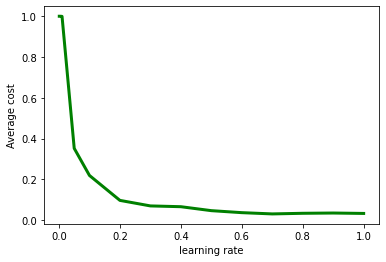

In [23]:
plt.figure(10)
plt.plot(lrList, errLr, 'g', linewidth = "3")
plt.xlabel('learning rate')
plt.ylabel('Average cost')
plt.show()

**6. What is the effect of the number of neurons in the hidden layer? To answer this question, you will need to consider and answer the following:**

**a. You will need to vary the number of neurons from 1 to 10. Does the update rule need to be changed/derived again? Why or why not?**

The update rule will not be changed but the size of the matrix of the weights will increase. There is no change as my notation and code are in the matrix form, so to include more neurons I only need to change the size of weight matrix.
The size of weights between inputs and the first hidden layers is $W^{[1]}_{n*2}$ where $n$ is the number of neurons and $2$ is the number of features.


**b. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.**

Increasing the number of neurons reduce the cost at the last iteration up to the 9 neurons. For 10 neurons the cost is increased. That means from 1 up to 9 neurons help reduce bias (reduce underfitting) but having 10 neurons increase variance (cause overfitting). 
The plots are in the below cells.

In [24]:
# hyperparameters

epochs = 1000     # number of epochs
lr = 0.1        # learning rate
n_h = 4         # number of neurons at hidden layers
activation = "sigmoid"          # sigmoid, relu, tanh

nhList = np.arange(1,11)
errNh = []
errNhAve = []
ytestHatNh = []
for n_h in nhList:
  # initialize the model
  myNetwork3 = mlpNet(xtrainSt, ytrainSt, activation)

  # train the model
  parameters3, J_all3 = myNetwork3.nn_model(n_h, lr,epochs, print_cost=False)

  # average least square error
  aveError3 = np.average(np.array(J_all3))

  errNhAve.append(aveError3)
  errNh.append(J_all3[-1])

  # prediction on test set
  ytestHatSc3 = myNetwork.predict(parameters3, xtestSt)

  # inverse the data standardization
  ytestHat3 = ytestHatSc3 * stdY + meanY
  ytestHat3 = ytestHat3.T
  
  ytestHatNh.append(ytestHat3)

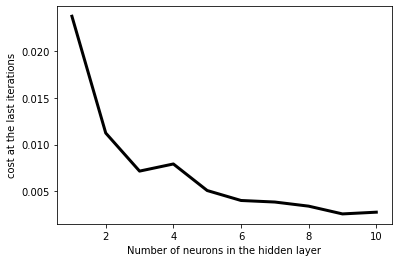

In [25]:
plt.figure(11)
plt.plot(nhList, errNh, 'k', linewidth = "3")
plt.xlabel('Number of neurons in the hidden layer')
plt.ylabel('cost at the last iterations')
plt.show()

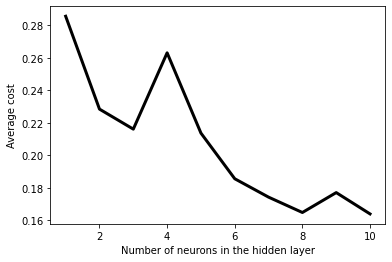

In [26]:
plt.figure(12)
plt.plot(nhList, errNhAve, 'k', linewidth = "3")
plt.xlabel('Number of neurons in the hidden layer')
plt.ylabel('Average cost')
plt.show()

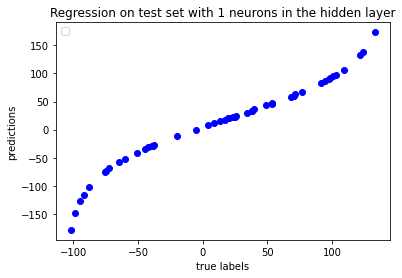

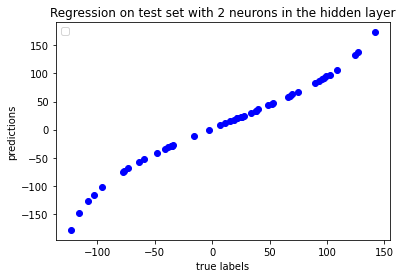

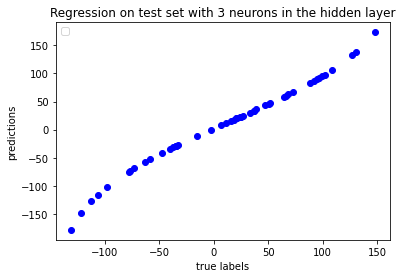

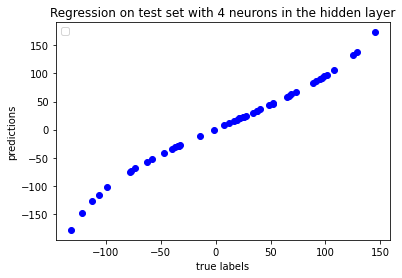

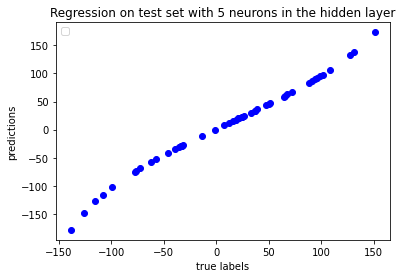

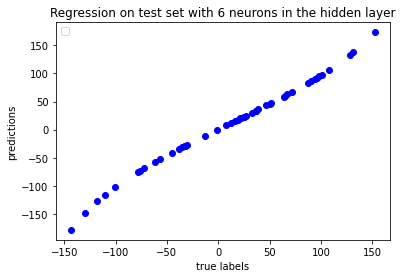

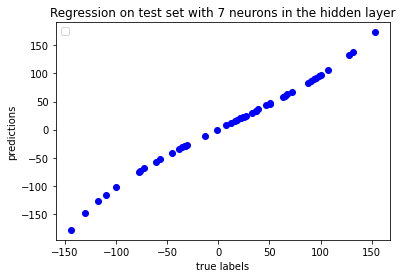

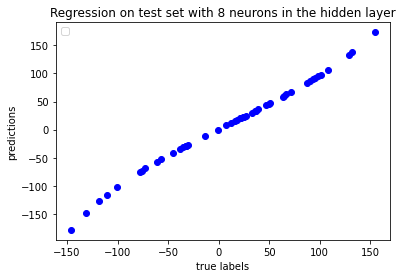

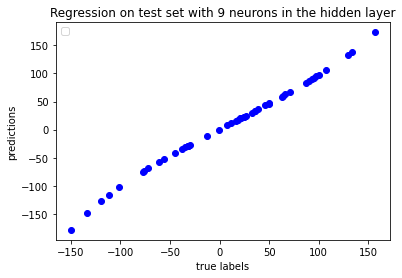

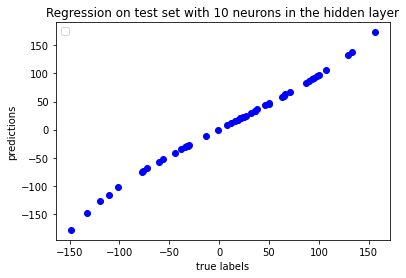

In [27]:
for ind in range(10):
  plt.figure(ind+13)
  plt.plot(ytestHatNh[ind][:,0], ytest[:,0], 'o', color = 'blue')
  plt.xlabel('true labels')
  plt.ylabel('predictions')
  plt.title("Regression on test set with {} neurons in the hidden layer".format(ind+1))
  plt.legend(loc="upper left")
plt.show()

**7. What is the effect of the activation functions in the network? Explore two different activation functions other than sigmoid such as tanh, linear, or ReLU.**

**a. Will you need to change the update rule?**
Yes, we need to change the update rule. The activation functions contribute to forward propagation to calculate the loss function. The derivative of the activation functions are present in the update rule, so by changing the activation functions their part in the chain rule must be changed too.

**b. What is the change that you need to make to achieve this experiment?**
We must change activation functions in the forward propagation where $g(W^T.x+b)$ can be any activation function. We must also change the derivative corresponding to the activation function in the chain rule in the backward propagation.

**c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.**

All activation functions work fine, but the prediction on the test set is a little better for relu. The predictions also depend on initialization (change at each time since it is random).
The plot is in the below cells.

**Relu is used in the next below cells.**


In [28]:
# hyperparameters

epochs=5000     # number of epochs
lr = 0.1        # learning rate
n_h = 4         # number of neurons at hidden layers
activation = "relu"          # sigmoid, relu, tanh

# initialize the model
myNetwork4 = mlpNet(xtrainSt, ytrainSt, activation)

# train the model
parameters4, J_all4 = myNetwork4.nn_model(n_h, lr,epochs, print_cost=False)

# average least square error
aveError4 = np.average(np.array(J_all4))
print("average cost with "+activation+" activation function  = ", aveError4)

average cost with relu activation function  =  0.016191005323495523


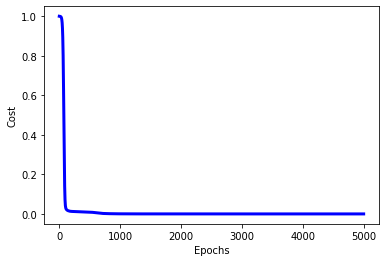

In [29]:
# plot the cost function
myNetwork4.plot_cost(J_all4, epochs, activation)

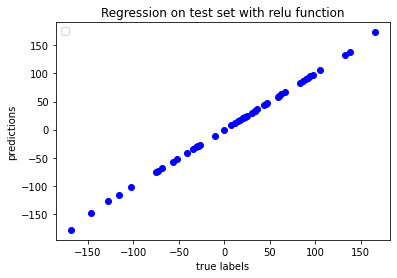

In [30]:
# prediction on test set
ytestHatSc4 = myNetwork4.predict(parameters4, xtestSt)

# inverse the data standardization
ytestHat4 = ytestHatSc4 * stdY + meanY
ytestHat4 = ytestHat4.T

plt.figure(24)
plt.plot(ytestHat4[:,0], ytest[:,0], 'o', color = 'blue')
plt.xlabel('true labels')
plt.ylabel('predictions')
plt.title("Regression on test set with "+activation+" function")
plt.legend(loc="upper left")
plt.show()

**tanh is used in the next below cells.**

In [31]:
# hyperparameters

epochs=5000     # number of epochs
lr = 0.1        # learning rate
n_h = 4         # number of neurons at hidden layers
activation = "tanh"          # sigmoid, relu, tanh

# initialize the model
myNetwork5 = mlpNet(xtrainSt, ytrainSt, activation)

# train the model
parameters5, J_all5 = myNetwork5.nn_model(n_h, lr,epochs, print_cost=False)

# average least square error
aveError5 = np.average(np.array(J_all5))
print("average cost with "+activation+" activation function  = ", aveError5)

average cost with tanh activation function  =  0.008427912653607452


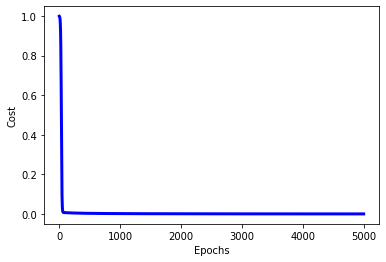

In [32]:
# plot the cost function
myNetwork5.plot_cost(J_all5, epochs, activation)

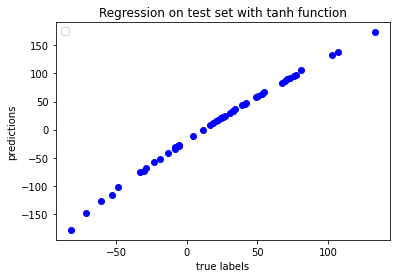

In [33]:
# prediction on test set
ytestHatSc5 = myNetwork5.predict(parameters4, xtestSt)

# inverse the data standardization
ytestHat5 = ytestHatSc5 * stdY + meanY
ytestHat5 = ytestHat5.T

plt.figure(25)
plt.plot(ytestHat5[:,0], ytest[:,0], 'o', color = 'blue')
plt.xlabel('true labels')
plt.ylabel('predictions')
plt.title("Regression on test set with "+activation+" function")
plt.legend(loc="upper left")
plt.show()